In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 487.6 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv(r'C:\Users\smriti\Downloads\dataset\wine_data.csv',header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [10]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

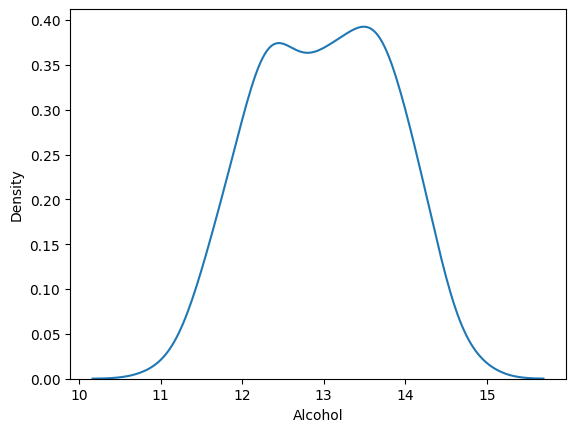

In [11]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

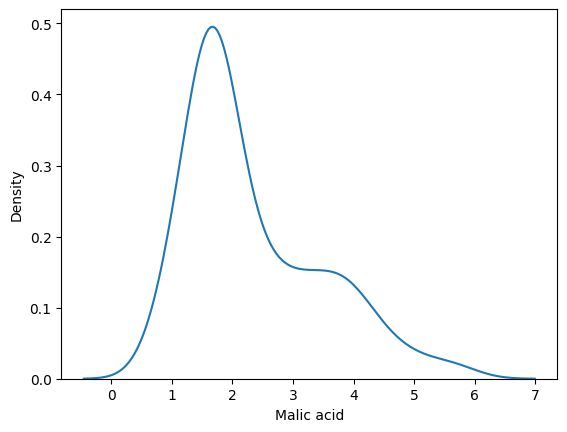

In [12]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

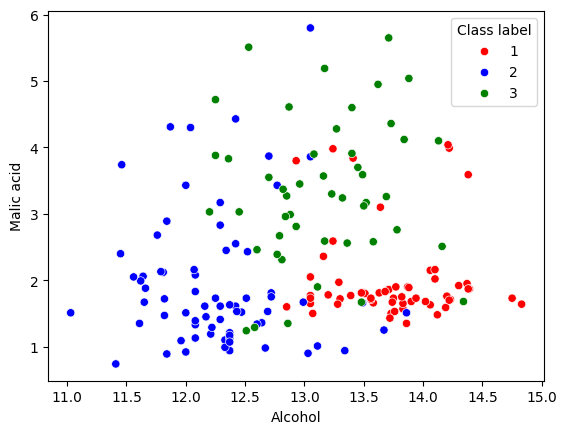

In [17]:

# Your color dictionary
color_dict = {1: 'red', 3: 'green', 2: 'blue'}

# Corrected code using sns.scatterplot
sns.scatterplot(x='Alcohol', y='Malic acid', hue='Class label', palette=color_dict, data=df)


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),df['Class label'], test_size=0.3, random_state=0 )
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled= scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [23]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scales= pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [24]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [25]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


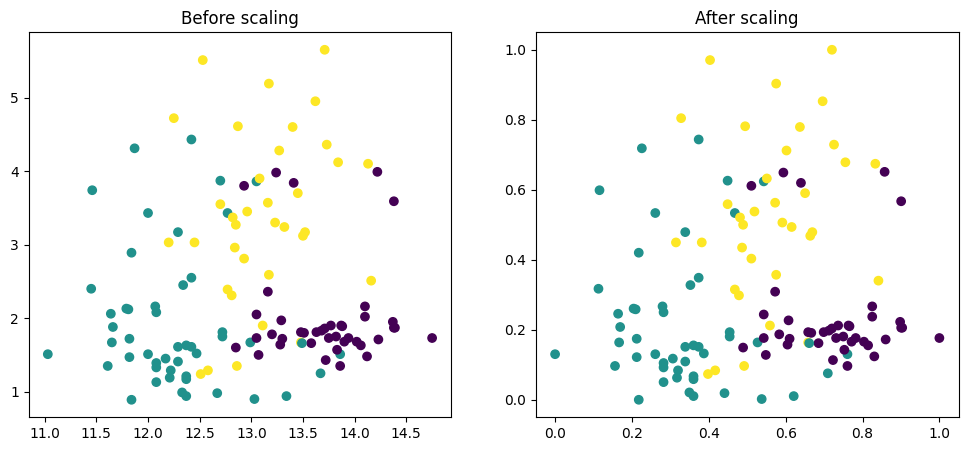

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After scaling")
plt.show()

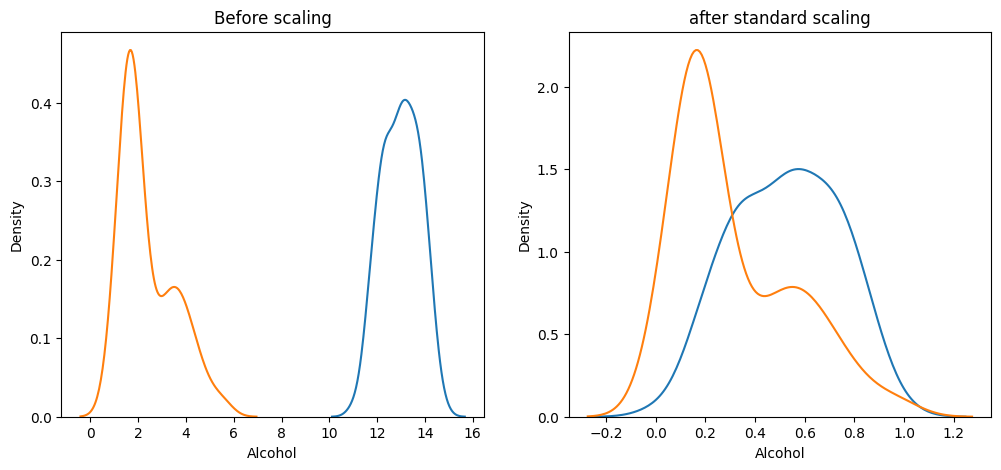

In [28]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

ax2.set_title('after standard scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt. show()

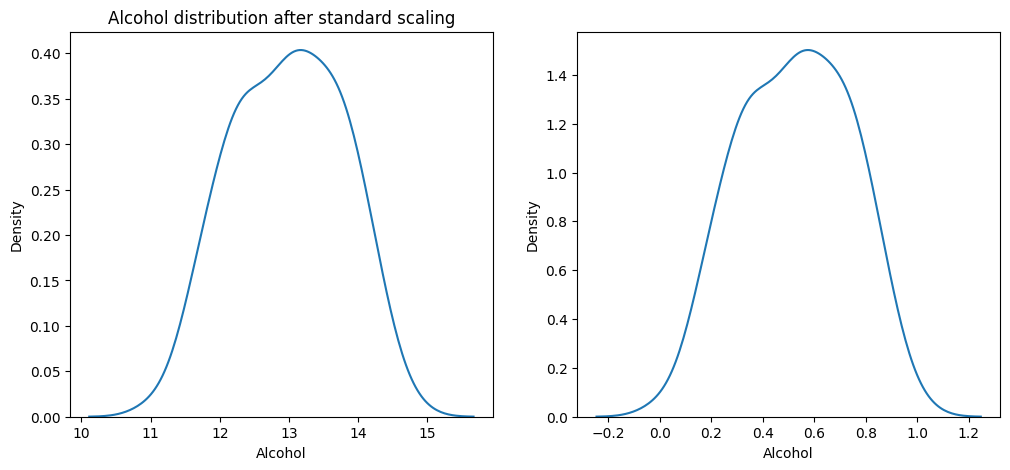

In [32]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Alcohol distribution before scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)

ax2.set_title('Alcohol distribution after standard scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
plt.show()

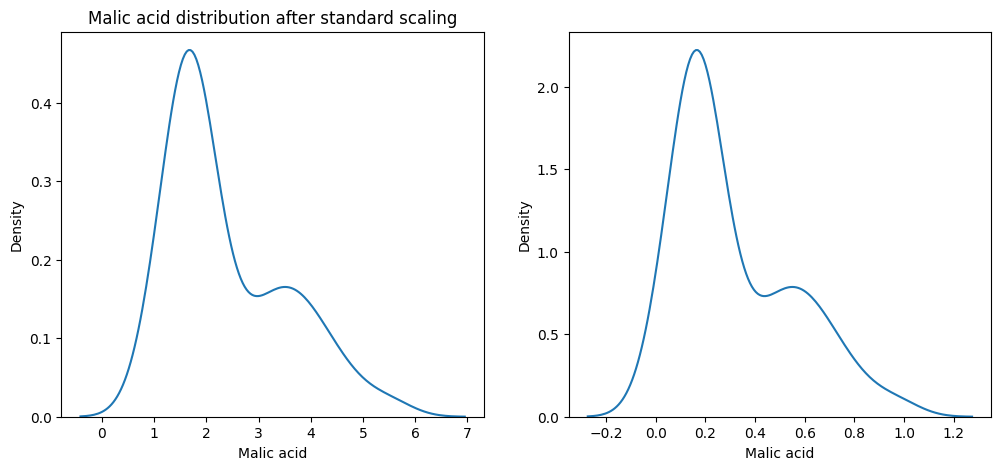

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Malic acid distribution before scaling')
sns.kdeplot(x_train['Malic acid'], ax=ax1)

ax2.set_title('Malic acid distribution after standard scaling')
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()